In [17]:
library(readxl)
library(rstatix)

In [18]:
Mood_Induction  = read_excel("D://Amar//Codes_Data//Mood_Induction.xlsx")

In [19]:
Mood_Induction = Mood_Induction %>% gather(key = "Mood", value = "Risk_aversion", Neutral_Mood, Positive_Mood, Negative_Mood)

In [20]:
Mood_Induction

id,group,Mood,Risk_aversion
<dbl>,<chr>,<chr>,<dbl>
1,Autism,Neutral_Mood,0.4700000
2,Autism,Neutral_Mood,0.4833333
3,Autism,Neutral_Mood,0.5233333
4,Autism,Neutral_Mood,0.5333333
5,Autism,Neutral_Mood,0.5500000
6,Autism,Neutral_Mood,0.5633333
7,Autism,Neutral_Mood,0.5666667
8,Autism,Neutral_Mood,0.5666667
9,Autism,Neutral_Mood,0.5766667


In [5]:
Mood_Induction %>% group_by(Mood, group) %>% get_summary_stats(Risk_aversion, type = "mean_sd")

group,Mood,variable,n,mean,sd
<chr>,<chr>,<fct>,<dbl>,<dbl>,<dbl>
ADHD,Negative_Mood,Risk_aversion,15,0.518,0.057
Autism,Negative_Mood,Risk_aversion,15,0.550,0.052
Control,Negative_Mood,Risk_aversion,15,0.452,0.047
ADHD,Neutral_Mood,Risk_aversion,15,0.555,0.052
Autism,Neutral_Mood,Risk_aversion,15,0.570,0.054
Control,Neutral_Mood,Risk_aversion,15,0.567,0.044
ADHD,Positive_Mood,Risk_aversion,15,0.549,0.056
Autism,Positive_Mood,Risk_aversion,15,0.564,0.057
Control,Positive_Mood,Risk_aversion,15,0.500,0.046


In [25]:
Mood_Induction %>% group_by(Mood, group) %>% identify_outliers(Risk_aversion)

group,Mood,id,Risk_aversion,is.outlier,is.extreme
<chr>,<chr>,<dbl>,<dbl>,<lgl>,<lgl>


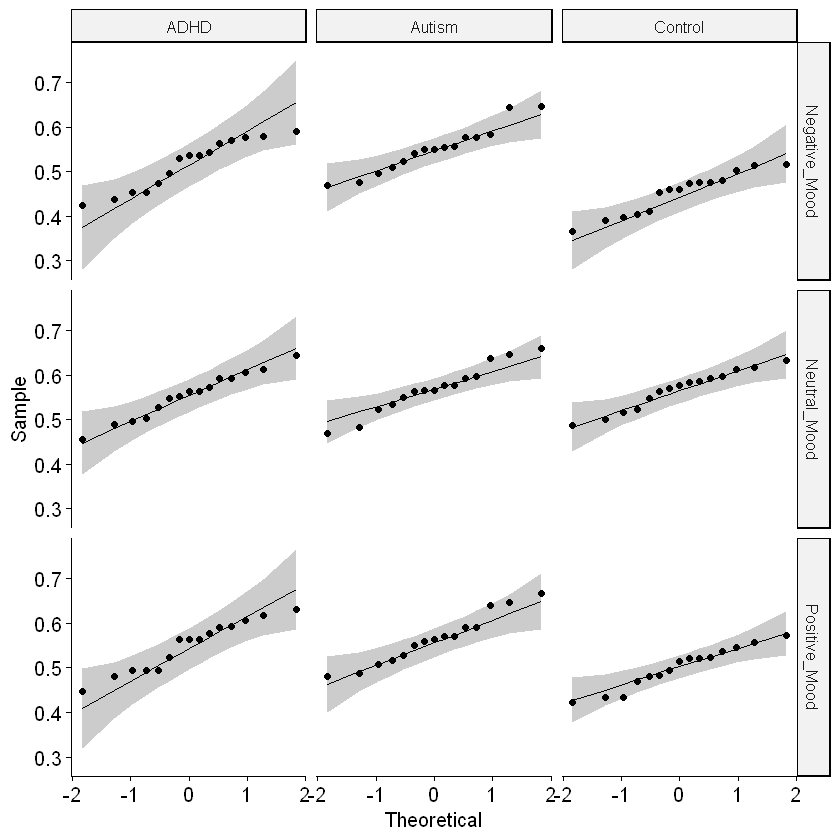

In [29]:
ggqqplot(Mood_Induction, "Risk_aversion") + facet_grid(Mood~group)

In [27]:
library(ggpubr)

Loading required package: ggplot2



In [30]:
Mood_Induction %>% group_by(Mood) %>% levene_test(Risk_aversion ~ group)

Warning message:
"There were 3 warnings in `mutate()`.
The first warning was:
ℹ In argument: `data = map(.data$data, .f, ...)`.
Caused by warning in `leveneTest.default()`:
! group coerced to factor.
ℹ Run `dplyr::last_dplyr_warnings()` to see the 2 remaining warnings."


Mood,df1,df2,statistic,p
<chr>,<int>,<int>,<dbl>,<dbl>
Negative_Mood,2,42,0.3350585,0.7171906
Neutral_Mood,2,42,0.1759211,0.8392990
Positive_Mood,2,42,0.2486797,0.7809698


# Tests Covariance Homogeniety.

In [32]:
box_m(Mood_Induction[, "Risk_aversion", drop = FALSE], Mood_Induction$group)

statistic,p.value,parameter,method
<dbl>,<dbl>,<dbl>,<chr>
1.930886,0.3808144,2,Box's M-test for Homogeneity of Covariance Matrices


# 1 in 1 mixed anova test

In [34]:
anova_test(data = Mood_Induction, dv = Risk_aversion, wid = id, between = group ,within  =Mood)

ANOVA Table (type II tests)

$ANOVA
      Effect DFn DFd       F        p p<.05   ges
1      group   2  42   4.352 1.90e-02     * 0.168
2       Mood   2  84 394.909 1.91e-43     * 0.179
3 group:Mood   4  84 110.188 1.38e-32     * 0.108

$`Mauchly's Test for Sphericity`
      Effect     W     p p<.05
1       Mood 0.884 0.079      
2 group:Mood 0.884 0.079      

$`Sphericity Corrections`
      Effect   GGe      DF[GG]    p[GG] p[GG]<.05   HFe      DF[HF]    p[HF]
1       Mood 0.896 1.79, 75.24 3.48e-39         * 0.933 1.87, 78.38 1.04e-40
2 group:Mood 0.896 3.58, 75.24 1.97e-29         * 0.933 3.73, 78.38 1.46e-30
  p[HF]<.05
1         *
2         *

In [10]:
Mood_Induction %>% group_by(Mood) %>% anova_test(dv = Risk_aversion, wid = id, between = group) %>% adjust_pvalue(method = "bonferroni")

Mood,Effect,DFn,DFd,F,p,p<.05,ges,p.adj
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
Negative_Mood,group,2,42,13.796,2.48e-05,*,0.396,7.44e-05
Neutral_Mood,group,2,42,0.365,6.96e-01,,0.017,1.00e+00
Positive_Mood,group,2,42,5.845,6.00e-03,*,0.218,1.80e-02


In [11]:
Mood_Induction %>% group_by(Mood) %>% pairwise_t_test(Risk_aversion ~ group, p.adjust.method = "bonferroni")

,Mood,.y.,group1,group2,n1,n2,p,p.signif,p.adj,p.adj.signif
,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<chr>,<dbl>,<chr>
1,Negative_Mood,Risk_aversion,ADHD,Autism,15,15,9.37e-02,ns,2.81e-01,ns
2,Negative_Mood,Risk_aversion,ADHD,Control,15,15,1.32e-03,**,3.96e-03,**
3,Negative_Mood,Risk_aversion,Autism,Control,15,15,6.38e-06,****,1.91e-05,****
4,Neutral_Mood,Risk_aversion,ADHD,Autism,15,15,4.30e-01,ns,1.00e+00,ns
5,Neutral_Mood,Risk_aversion,ADHD,Control,15,15,5.10e-01,ns,1.00e+00,ns
6,Neutral_Mood,Risk_aversion,Autism,Control,15,15,8.95e-01,ns,1.00e+00,ns
7,Positive_Mood,Risk_aversion,ADHD,Autism,15,15,4.35e-01,ns,1.00e+00,ns
8,Positive_Mood,Risk_aversion,ADHD,Control,15,15,1.69e-02,*,5.07e-02,ns
9,Positive_Mood,Risk_aversion,Autism,Control,15,15,2.12e-03,**,6.36e-03,**


In [12]:
Mood_Induction %>% group_by(group) %>% anova_test(dv = Risk_aversion, wid = id, within = Mood) %>% get_anova_table() %>% adjust_pvalue(method = "bonferroni")

group,Effect,DFn,DFd,F,p,p<.05,ges,p.adj
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
ADHD,Mood,2,28,77.462,3.88e-12,*,0.086,1.164e-11
Autism,Mood,2,28,14.830,4.05e-05,*,0.024,1.215e-04
Control,Mood,2,28,489.732,1.64e-22,*,0.531,4.920e-22


In [13]:
Mood_Induction %>% group_by(group) %>% pairwise_t_test(Risk_aversion ~ Mood, paired = TRUE, p.adjust.method = "bonferroni")

,group,.y.,group1,group2,n1,n2,statistic,df,p,p.adj,p.adj.signif
,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,ADHD,Risk_aversion,Negative_Mood,Neutral_Mood,15,15,-10.511738,14,5.02e-08,1.51e-07,****
2,ADHD,Risk_aversion,Negative_Mood,Positive_Mood,15,15,-11.289035,14,2.04e-08,6.12e-08,****
3,ADHD,Risk_aversion,Neutral_Mood,Positive_Mood,15,15,1.824491,14,9.00e-02,2.68e-01,ns
4,Autism,Risk_aversion,Negative_Mood,Neutral_Mood,15,15,-4.379029,14,6.30e-04,2.00e-03,**
5,Autism,Risk_aversion,Negative_Mood,Positive_Mood,15,15,-3.771711,14,2.00e-03,6.00e-03,**
6,Autism,Risk_aversion,Neutral_Mood,Positive_Mood,15,15,2.005979,14,6.50e-02,1.94e-01,ns
7,Control,Risk_aversion,Negative_Mood,Neutral_Mood,15,15,-27.071011,14,1.72e-13,5.16e-13,****
8,Control,Risk_aversion,Negative_Mood,Positive_Mood,15,15,-14.828119,14,5.93e-10,1.78e-09,****
9,Control,Risk_aversion,Neutral_Mood,Positive_Mood,15,15,19.110662,14,1.99e-11,5.97e-11,****
